In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("netflix_cleaned_v2.csv")

# Check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,quarter_added,duration_int,target_audience,content_age,added_delay,genre_count,is_multinational
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Q3,90.0,Not Rated,6,1,1,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Q3,2.0,Adults,5,0,3,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Q3,1.0,Adults,5,0,3,False
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Q3,1.0,Adults,5,0,2,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Q3,2.0,Adults,5,0,3,False


## Milestone 2 – Exploratory Data Analysis (EDA)

### Introduction

In this milestone, we perform Exploratory Data Analysis (EDA) on the cleaned Netflix dataset to understand the data better and discover useful insights.

The main goals of this analysis are:

* To understand the distribution of different types of content (Movies vs TV Shows).
* To analyze genre patterns and trends.
* To study how content has grown over the years.
* To examine which countries produce the most content.
* To create meaningful features that help in deeper analysis.

EDA is divided into two parts:

* **Univariate Analysis** – analyzing one variable at a time to understand its distribution.
* **Bivariate Analysis** – analyzing the relationship between two variables to find patterns and trends.




##  Univariate Analysis

Univariate analysis involves examining one variable at a time to understand its distribution, frequency, and overall characteristics.


### Variables Selected for Univariate Analysis

The following variables are selected for individual analysis:

**Original Content Features:**

* **Type** – Distribution of Movies vs TV Shows.
* **Genre (listed_in)** – Most common content categories.
* **Release Year** – Content production trends over time.
* **Country** – Country-wise content distribution.
* **Rating** – Audience maturity levels.
* **Duration (duration_int)** – Content length patterns.

**Engineered Features:**

* **Target Audience** – Categorized maturity groups.
* **Content Age** – Age of content from release.
* **Genre Count** – Number of genres per title.
* **Is Multinational** – Whether content is produced by multiple countries.

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'quarter_added', 'duration_int', 'target_audience',
       'content_age', 'added_delay', 'genre_count', 'is_multinational'],
      dtype='str')

1. Distribution of Content Type

This analysis examines the distribution of content types available in the dataset, specifically comparing Movies and TV Shows.

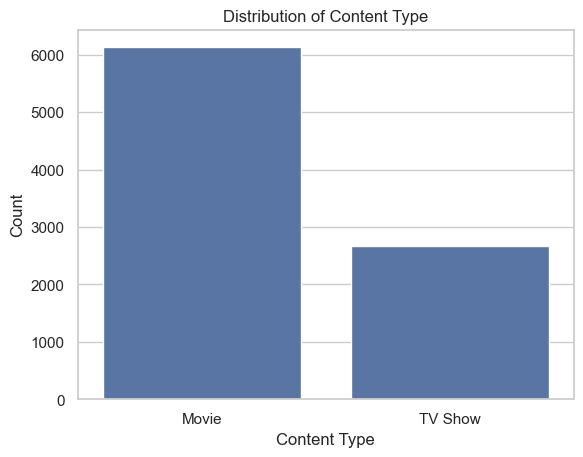

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='type', data=df)

plt.title("Distribution of Content Type")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

**Interpretation**

The visualization shows the distribution of Movies and TV Shows in the dataset. From the chart, we can observe which type of content is more dominant.

**2.Distribution of Release Year**

This analysis examines how content is distributed across different release years to understand production trends over time.

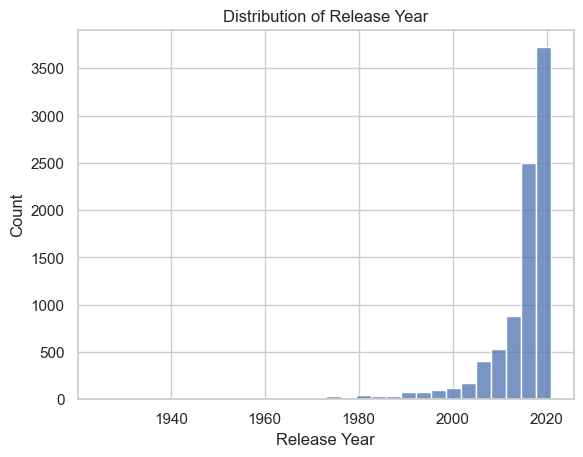

In [10]:
plt.figure()
sns.histplot(df['release_year'], bins=30)

plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

**Interpretation**

Content releases increase significantly after 2010, with a sharp peak between 2018 and 2021.
This indicates rapid growth in content production during recent years, reflecting the expansion of the streaming industry.

**3.Top Genres Distribution**

This analysis identifies the most common genres in the dataset to understand dominant content categories.

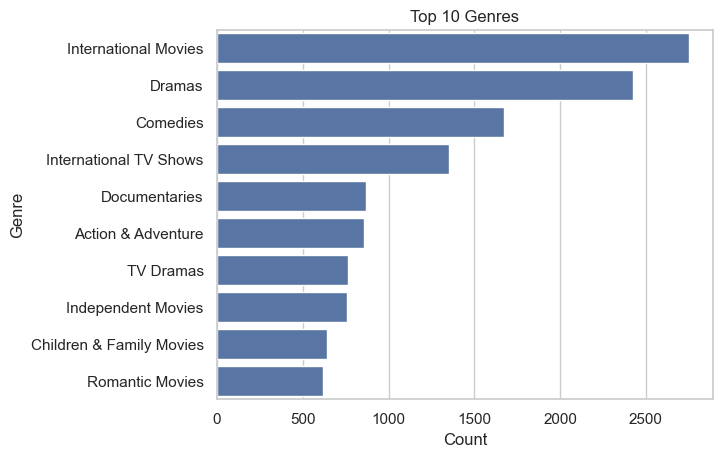

In [11]:
# Extract individual genres
genre_series = df['listed_in'].str.split(', ').explode()

# Get top 10 genres
top_genres = genre_series.value_counts().head(10)

plt.figure()
sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Interpretation**

International Movies is the most dominant genre, followed by Dramas and Comedies. The high frequency of international categories indicates a strong focus on global content. Other genres such as Documentaries and Action & Adventure appear significantly less frequent compared to the top categories.

**4. Top Countries by Content Production**

This analysis examines which countries contribute the most content to the dataset.

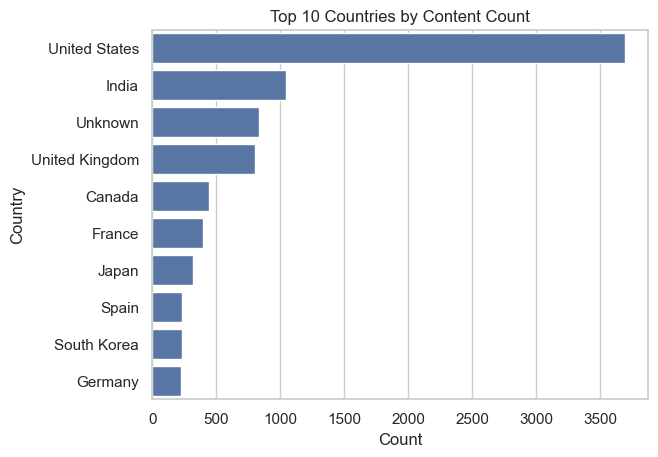

In [12]:
# Split multiple countries
country_series = df['country'].dropna().str.split(', ').explode()

# Get top 10 countries
top_countries = country_series.value_counts().head(10)

plt.figure()
sns.barplot(x=top_countries.values, y=top_countries.index)

plt.title("Top 10 Countries by Content Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

**Interpretation**

The United States contributes the highest number of titles, followed by India and the United Kingdom. This indicates a strong dominance of US-produced content in the dataset. However, the presence of multiple countries in the top rankings reflects a globally diverse content library.

In [13]:
df.loc[df['rating'].str.contains('min', case=False, na=False), 'rating'] = None

**5. Distribution of Content Ratings**

This analysis examines the distribution of content ratings to understand the target maturity levels of the content library.

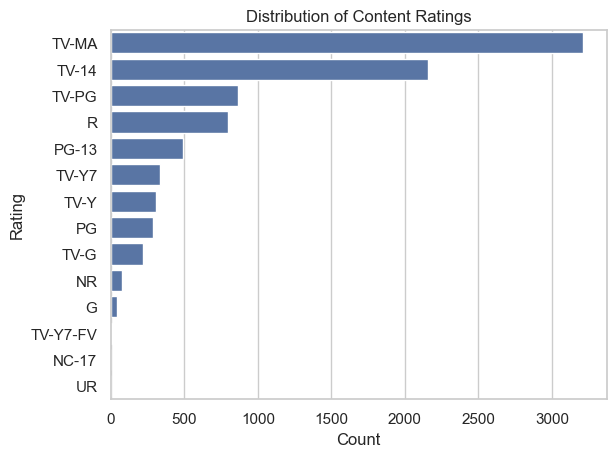

In [14]:
plt.figure()
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)

plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

**Interpretation**

TV-MA is the most common content rating, followed by TV-14. This indicates that a large portion of the content is targeted toward mature and teenage audiences. Overall, the distribution suggests a stronger focus on adult-oriented programming within the content library.

**6. Duration Analysis by Content Type**

Since movies and TV shows have different duration scales (minutes vs seasons), duration is analyzed separately for each content type.

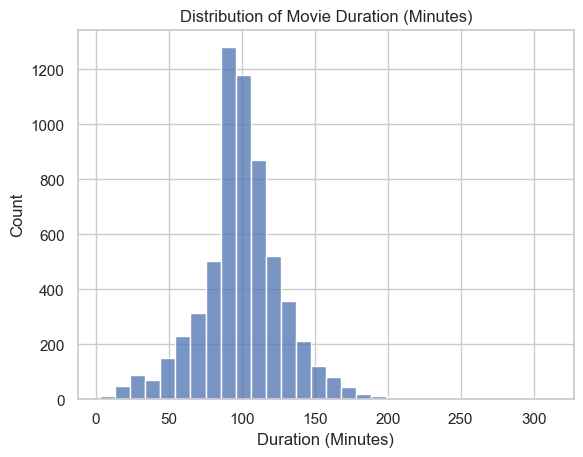

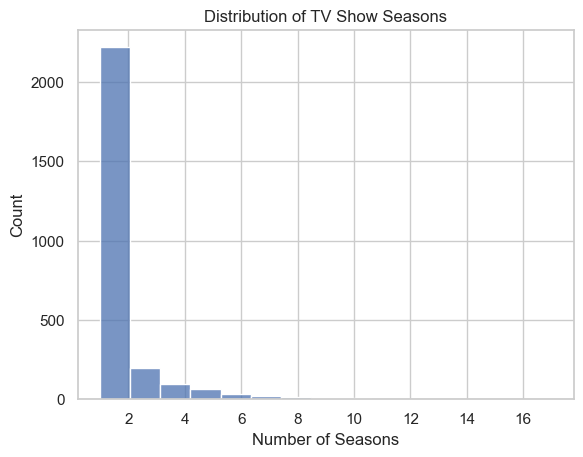

In [15]:
plt.figure()
sns.histplot(df[df['type'] == 'Movie']['duration_int'], bins=30)

plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.histplot(df[df['type'] == 'TV Show']['duration_int'], bins=15)

plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

**Interpretation**

Most movies fall between 80 and 120 minutes, with a peak around the standard 100-minute runtime. The distribution is approximately bell-shaped, indicating a typical feature-length pattern. A small number of longer films create a slight right skew in the distribution.

The majority of TV shows consist of only one season, with a sharp decline as the number of seasons increases. Multi-season shows are relatively rare, resulting in a right-skewed distribution with a small number of long-running series.

**7. Distribution of Target Audience (Engineered Feature)**

This analysis examines the distribution of content based on categorized audience groups derived from ratings.

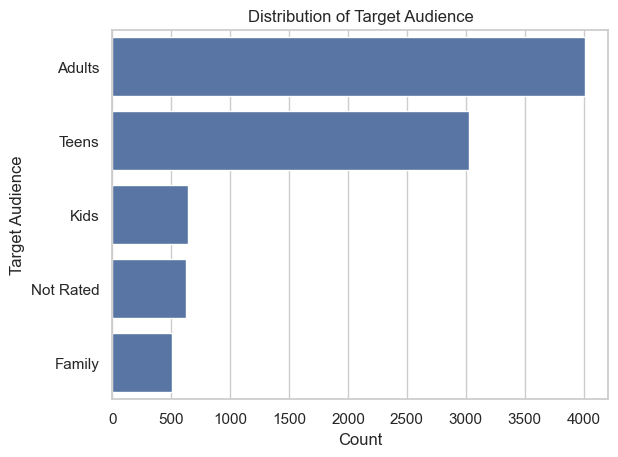

In [16]:
plt.figure()
sns.countplot(y='target_audience', data=df, order=df['target_audience'].value_counts().index)

plt.title("Distribution of Target Audience")
plt.xlabel("Count")
plt.ylabel("Target Audience")
plt.show()

**Interpretation**

The majority of content is targeted toward Adults, followed by Teens, indicating a strong focus on mature and young-adult audiences. Content designed specifically for Kids and Family audiences represents a smaller portion of the library. Overall, the distribution reflects a content strategy centered primarily on older viewers.

**4. Content Type vs Duration**

This analysis examines how duration differs between Movies and TV Shows. Since Movies are measured in minutes and TV Shows in number of seasons, their distributions are analyzed separately to ensure accurate comparison.

<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\athav\AppData\Local\Temp\ipykernel_1436\709787250.py:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)


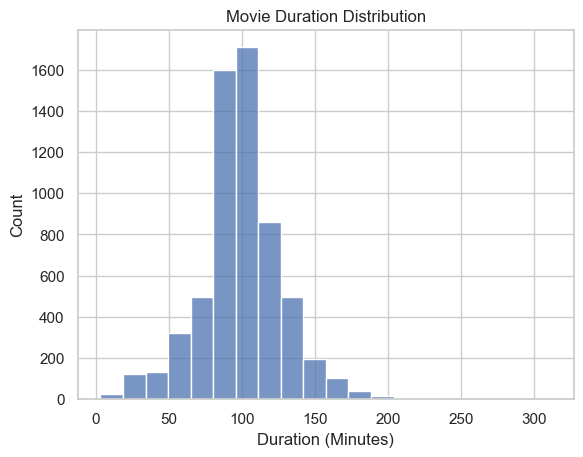

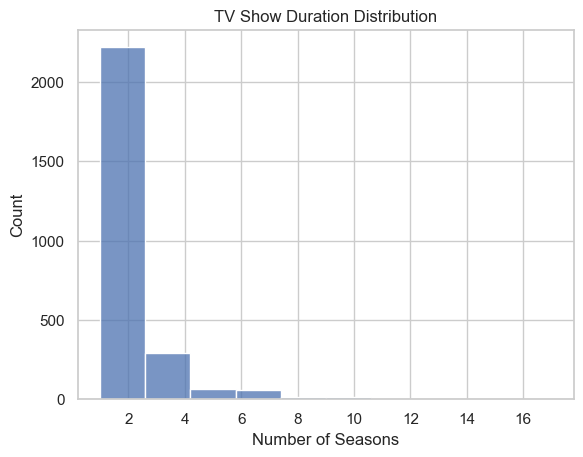

In [17]:
# Create clean numeric duration column
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Separate
movies = df[df['type'] == "Movie"]
tv_shows = df[df['type'] == "TV Show"]

# Movie plot
plt.figure()
sns.histplot(movies['duration_numeric'], bins=20)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

# TV plot
plt.figure()
sns.histplot(tv_shows['duration_numeric'], bins=10)
plt.title("TV Show Duration Distribution")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis ##

Bivariate analysis examines the relationship between two variables to identify patterns and meaningful insights within the dataset.

**1. Content Growth Over Time by Type**

This analysis compares the growth trend of Movies and TV Shows across release years.

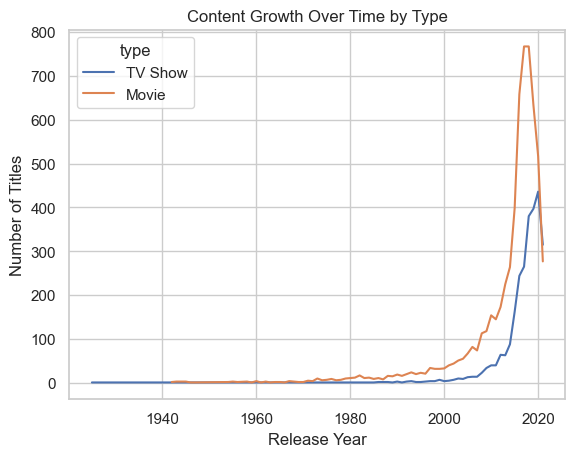

In [18]:
# Group data by release_year and type
growth_data = df.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure()

sns.lineplot(
    data=growth_data,
    x='release_year',
    y='count',
    hue='type'
)

plt.title("Content Growth Over Time by Type")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

**Interpretation**

Both Movies and TV Shows show significant growth after 2010, reflecting rapid expansion in content production. Movies consistently maintain higher release counts compared to TV Shows, with a peak around 2018. TV Shows also demonstrate strong growth during the modern streaming era, though at a lower overall volume.

**2. Content Type vs Target Audience**

This analysis explores how target audience categories are distributed across Movies and TV Shows.

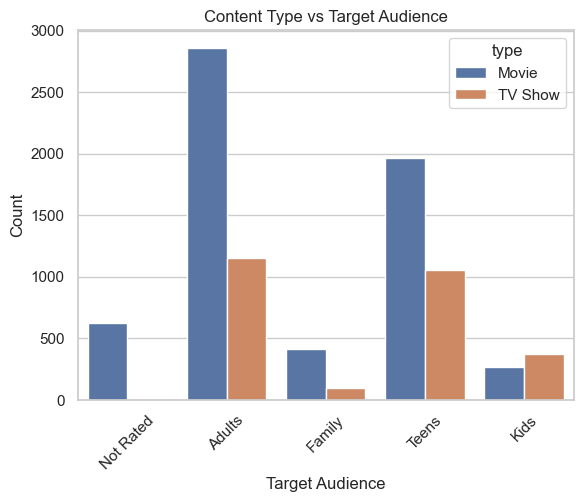

In [19]:
plt.figure()

sns.countplot(
    data=df,
    x='target_audience',
    hue='type'
)

plt.title("Content Type vs Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Interpretation**

Movies dominate most target audience categories, particularly in the Adults and Teens segments. While both content types focus primarily on mature and teenage audiences, TV Shows exceed Movies in the Kids category, suggesting a stronger presence of episodic content for younger viewers. Overall, Movies maintain higher volume across nearly all audience groups.

**3. Country vs Content Type**

This analysis examines how Movies and TV Shows are distributed across the top content-producing countries.

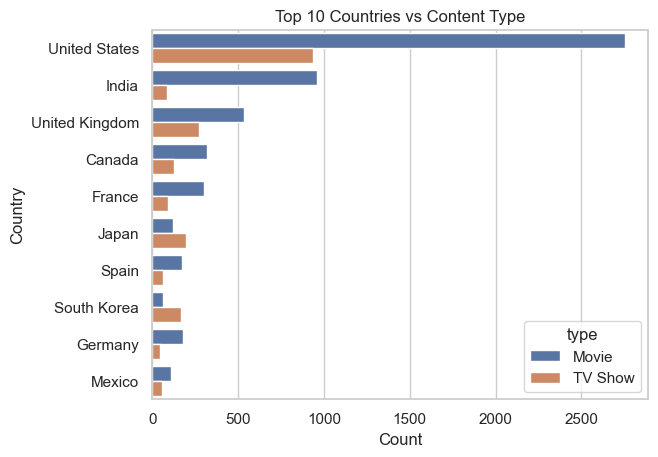

In [20]:
# Get top 10 real countries (exclude Unknown)
top_countries = (
    df[df['country'] != "Unknown"]['country']
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
    .index
)

# Prepare exploded dataset
df_top_countries = df[
    (df['country'] != "Unknown") & (df['country'].notna())
].copy()

df_top_countries = df_top_countries.assign(
    country_split=df_top_countries['country'].str.split(', ')
).explode('country_split')

df_top_countries = df_top_countries[
    df_top_countries['country_split'].isin(top_countries)
]

plt.figure()

sns.countplot(
    data=df_top_countries,
    y='country_split',
    hue='type',
    order=top_countries
)

plt.title("Top 10 Countries vs Content Type")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

**Interpretation**

The United States dominates content production, leading significantly in both Movies and TV Shows. Most countries, including India and the UK, produce far more Movies than TV Shows. Japan and South Korea are notable exceptions, where TV Show production exceeds Movies. Overall, global content production is heavily concentrated in the US, with clear regional format preferences.

**5. Content Type vs Genre Count**

This analysis compares how many genres are typically associated with Movies and TV Shows, highlighting differences in content complexity.

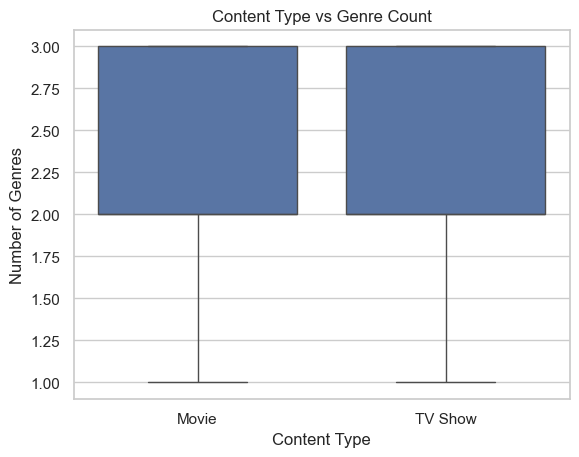

In [21]:
plt.figure()

sns.boxplot(
    data=df,
    x='type',
    y='genre_count'
)

plt.title("Content Type vs Genre Count")
plt.xlabel("Content Type")
plt.ylabel("Number of Genres")
plt.show()

**Interpretation (Short)**

Movies and TV Shows show nearly identical genre complexity, with most titles associated with 2–3 genres. There is minimal variation between the two content types, suggesting similar multi-genre structuring across formats.

## Hypothesis 1: Multinational Productions Are More Common in Movies ##

It is assumed that Movies are more likely to involve multinational collaborations compared to TV Shows due to higher production budgets and international distribution strategies.

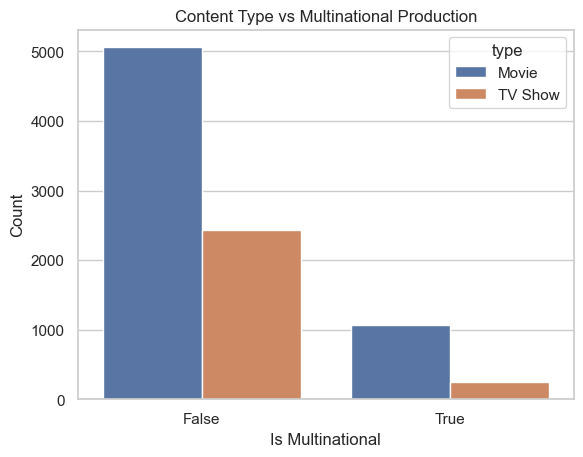

In [22]:
plt.figure()

sns.countplot(
    data=df,
    x='is_multinational',
    hue='type'
)

plt.title("Content Type vs Multinational Production")
plt.xlabel("Is Multinational")
plt.ylabel("Count")
plt.show()

**Interpretation**

The majority of content is produced within a single country, with non-multinational titles significantly outnumbering multinational ones. Movies are more likely than TV Shows to involve international collaborations, although multinational productions represent a relatively small share overall.

**Analysis:**
The countplot comparing content type and multinational production shows that Movies have a noticeably higher number of multinational titles compared to TV Shows.

## Hypothesis 2: Adult-Oriented Content Increased After 2010 ##

**Assumption:**
With the rise of streaming platforms after 2010, it is assumed that Adult-targeted content increased more significantly compared to other audience groups.

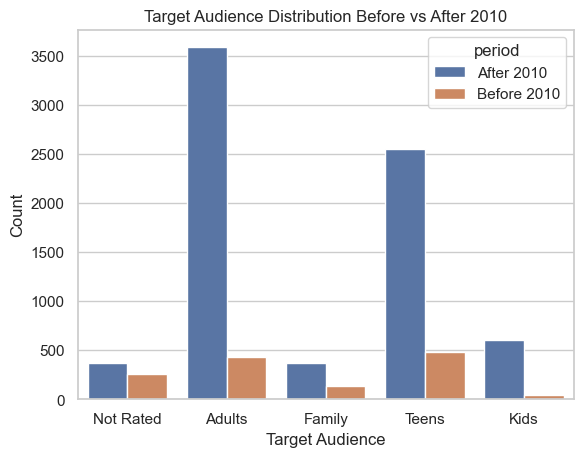

In [23]:
# Create period column
df['period'] = df['release_year'].apply(lambda x: 'After 2010' if x >= 2010 else 'Before 2010')

plt.figure()

sns.countplot(
    data=df,
    x='target_audience',
    hue='period'
)

plt.title("Target Audience Distribution Before vs After 2010")
plt.xlabel("Target Audience")
plt.ylabel("Count")
plt.show()

**Analysis:**
The comparison between content released before and after 2010 shows a substantial increase in Adult-oriented titles in the post-2010 period. While all audience categories experienced growth, the Adult segment demonstrates the most pronounced expansion.

**Conclusion:**
The hypothesis is supported. Adult-targeted content increased dramatically after 2010, suggesting a strategic shift toward mature audiences in the modern streaming era.


## Key Insights

* The United States dominates global content production, significantly outpacing other countries in both Movies and TV Shows.
* Movies consistently outnumber TV Shows across most audience and production categories.
* Adult-targeted content experienced substantial growth after 2010, reflecting a strategic shift in the streaming era.
* Multinational collaborations are more common in Movies than in TV Shows, indicating stronger cross-border investment in film production.
* The majority of TV Shows consist of a single season, with long-running series being relatively rare.
* Content production accelerated sharply after 2010, marking a major expansion period in the industry.
.
